In [1]:
import os
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy import special

In [2]:
df_overall = pd.read_csv("df_combined.csv")
gdp=pd.read_excel('GDP_per_capita.xlsx')

C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\2306759469.py:1: DtypeWarning: Columns (8,23,35,53,59,89,95,98,116,119,122,155,197,212,257,281,290,314,323,356,368,371,386,398,437,467,494,509,533) have mixed types. Specify dtype option on import or set low_memory=False.
  df_overall = pd.read_csv("df_combined.csv")


In [3]:
gdp['mean']=gdp.iloc[:, 1:].mean(axis=1)
df_overall=pd.merge(df_overall, gdp.iloc[:, [0,-1]], how='left', left_on=['country'], right_on=['Country Code'])

In [4]:
col=df_overall.columns
col=np.array(col)

array(['fide_id', 'country', 'name', 'flag', 'Ratings_nov22',
       'Games_nov22', 'Title_nov22', 'Ratings_aug12', 'Games_aug12',
       'Title_aug12', 'Ratings_sep12', 'Games_sep12', 'Title_sep12',
       'Ratings_jun21', 'Games_jun21', 'Title_jun21', 'Ratings_jan20',
       'Games_jan20', 'Title_jan20', 'Ratings_JAN08', 'Games_JAN08',
       'Title_JAN08', 'Ratings_mar12', 'Games_mar12', 'Title_mar12',
       'Ratings_APR05', 'Games_APR05', 'Title_APR05', 'Ratings_APR04',
       'Games_APR04', 'Title_APR04', 'Ratings_mar13', 'Games_mar13',
       'Title_mar13', 'Ratings_jan09', 'Games_jan09', 'Title_jan09',
       'Ratings_jan21', 'Games_jan21', 'Title_jan21', 'Ratings_jun20',
       'Games_jun20', 'Title_jun20', 'Ratings_sep13', 'Games_sep13',
       'Title_sep13', 'Ratings_aug13', 'Games_aug13', 'Title_aug13',
       'Ratings_jul22', 'Games_jul22', 'Title_jul22', 'Ratings_jul08',
       'Games_jul08', 'Title_jul08', 'Ratings_jul20', 'Games_jul20',
       'Title_jul20', 'Ratings_se

In [5]:
yr=list([])
yr1=list([])
mth=list([])
for  i in col:
    if 'Ratings_' in i:
        yr.append(i[-2:])
        yr1.append(int('20' + i[-2:]))
        mth.append(i[-5:-2])


month=list([])
for i in range(len(mth)):
    mname = mth[i]
    mnum = datetime.strptime(mname, '%b').month
    month.append(mnum)

for i in range(len(yr)):
    df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])

C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_overall[('Age_' + mth[i] + yr[i])]=yr1[i] - np.array(df_overall.loc[:,'Dob'])
C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\3447809095.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [6]:
df_overall

,fide_id,country,name,flag,Ratings_nov22,Games_nov22,Title_nov22,Ratings_aug12,Games_aug12,Title_aug12,...,Age_apr21,Age_apr09,Age_jan10,Age_JAN04,Age_JAN05,Age_jan11,Age_apr08,Age_apr20,Age_JUL06,Age_jul12
0,8519790,NaN,NGR M,NaN,1834,0,NaN,NaN,NaN,NaN,...,2021,2009,2010,2004,2005,2011,2008,2020,2006,2012
1,25121731,IND,A C J John,i,1063,0,NaN,NaN,NaN,NaN,...,34,22,23,17,18,24,21,33,19,25
2,35077023,IND,A Chakravarthy,i,1151,0,NaN,NaN,NaN,NaN,...,35,23,24,18,19,25,22,34,20,26
3,10207538,BAN,"A E M, Doshtagir",i,1840,0,NaN,1864.0,0.0,NaN,...,47,35,36,30,31,37,34,46,32,38
4,10680810,EGY,"A hamed Ashraf, Abdallah",i,1728,0,NaN,NaN,NaN,NaN,...,20,8,9,3,4,10,7,19,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401059,21836060,POL,"Zyto, Karol",NaN,1616,0,NaN,NaN,NaN,NaN,...,15,3,4,-2,-1,5,2,14,0,6
401060,34190632,RUS,"Zyubin, Sergey",i,1884,0,NaN,NaN,NaN,NaN,...,46,34,35,29,30,36,33,45,31,37
401061,24232602,RUS,"Zyuzev, Pavel",i,1856,0,NaN,NaN,NaN,NaN,...,28,16,17,11,12,18,15,27,13,19
401062,1189980,POL,"Zywert, Kacper",NaN,1519,0,NaN,NaN,NaN,NaN,...,22,10,11,5,6,12,9,21,7,13


In [7]:
metadata_columns = ["fide_id", "country", "flag", "Title_nov22", "Dob"]

df_cluster=df_overall.iloc[:,[0,6]]

df_cluster['Dob']=df_overall['Dob']
df_cluster=df_cluster.reset_index()
df_cluster=df_cluster.set_index(["fide_id", "Dob"])

C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\2646925764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Dob']=df_overall['Dob']


In [8]:
df_cluster5=df_cluster.dropna(subset=["Title_nov22"],axis=0)
df_cluster=df_cluster5[df_cluster5["Title_nov22"].isin(['GM','Gm','gm'])]
df_clusteri=df_cluster5[df_cluster5["Title_nov22"].isin(['IM','Im','im'])]

In [9]:
df_overall = df_overall.set_index("fide_id")
df_overall = df_overall[~df_overall.index.duplicated(keep='last')]
bad_dob_values = ['0000', '0', '20', '40', '1900', 0, 20, 40, 1900]
df_overall = df_overall.loc[~df_overall['Dob'].isin(bad_dob_values)]
metadata_columns = ["fide_id", "country", "flag", "Title_nov22", "Dob"]


In [10]:
rating_columns = []
games_columns = []

for col in df_overall.columns:
    if ("Ratings" in col):
        rating_columns.append(col)
    elif ("Games" in col):
        games_columns.append(col)

In [11]:
df_num_games = df_overall[[*games_columns]]
for col in df_num_games.columns:
    df_num_games[col] = pd.to_numeric(df_num_games[col],errors='coerce').fillna(0)
df_ratings = df_overall[[*rating_columns]]
for col in df_num_games.columns:
    month = col[-5:-2].upper()
    year = col[-2:]
    df_num_games = df_num_games.rename(columns={col: month+"-"+year})
for col in df_ratings.columns:
    month = col[-5:-2].upper()
    year = col[-2:]
    df_ratings = df_ratings.rename(columns={col: month+"-"+year})
timesorted_columns = sorted(list(df_num_games.columns.values), key= lambda x: datetime.strptime(x, "%b-%y"))
df_num_games = df_num_games[timesorted_columns]


C:\Users\chitv\AppData\Local\Temp\ipykernel_35508\972811920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_games[col] = pd.to_numeric(df_num_games[col],errors='coerce').fillna(0)


In [12]:
df_ratings = df_ratings[timesorted_columns]
df_cumulative_games = df_num_games.cumsum(axis=1)
df_cumulative_games = df_cumulative_games.join(df_overall[['Dob']], how="inner")
df_ratings=df_ratings.join(df_overall[['Dob']], how="inner")
df_cumulative_games = df_cumulative_games.reset_index().set_index(["fide_id", "Dob"])
df_ratings = df_ratings.reset_index().set_index(["fide_id", "Dob"])
df_cumulative_games['games_under_age_limit'] = pd.Series(dtype='float64')
df_cumulative_games['rating'] = pd.Series(dtype='float64')
age_limit = 12
cum_games_under_age = []

for idx,row in df_cumulative_games.iterrows():
    yob = idx[1]
    if (yob<1992 or yob>2005):
        continue
    else:
        month = "JAN"
        year = str(yob+age_limit+1)[-2:]
        if (int(year)>22):
            year="22"
        row['games_under_age_limit'] = (row[month+"-"+year])
        row['rating']=  df_ratings.loc[idx,month+"-"+year]

In [13]:
df_cumulative_games = df_cumulative_games.dropna(subset=["games_under_age_limit"],axis=0)
df_cumulative_games_filtered = df_cumulative_games.loc[df_cumulative_games['games_under_age_limit']>5]


In [14]:
df_cumulative_games_filtered=df_cumulative_games_filtered.iloc[:,[-1,-2]]
df_cumulative_games_filtered=df_cumulative_games_filtered.dropna(subset=["rating"],axis=0)

In [15]:
df_cluster = df_cluster[~df_cluster.index.duplicated(keep='last')]
df_cluster1=df_cumulative_games_filtered.join(df_cluster['Title_nov22'],how='left')
df_cumulative_games_filtered


,,rating,games_under_age_limit
fide_id,Dob,,
4804929,2001,1596.0,58.0
25682938,2004,1094.0,14.0
45051909,2005,1388.0,93.0
45094586,2004,1310.0,36.0
45013691,2005,1152.0,7.0
...,...,...,...
1185659,1999,1346.0,11.0
1189654,1999,1351.0,10.0
44160267,2005,1638.0,99.0


In [16]:
df_cluster1=df_cluster1[df_cluster1['Title_nov22'].isin(['GM','Gm','gm'])]
df_cluster1

,,rating,games_under_age_limit,Title_nov22
fide_id,Dob,,,
13402960,1995,2380.0,155.0,GM
13703544,2000,2169.0,226.0,GM
14204118,2004,2429.0,332.0,GM
5018471,1992,2093.0,43.0,GM
24183555,2000,2259.0,177.0,GM
...,...,...,...,...
912336,1999,2142.0,100.0,GM
4145097,1997,2035.0,88.0,GM
24101940,1998,2228.0,136.0,GM


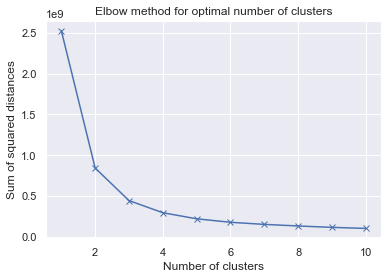

In [17]:
from sklearn.cluster import KMeans
ssd = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cumulative_games_filtered) 
    ssd.append(kmeans.inertia_)
plt.plot(range(1,11), ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 23)
y_kmeans = kmeans.fit_predict(df_cumulative_games_filtered)
y_kmeans

array([3, 2, 0, ..., 3, 1, 2])

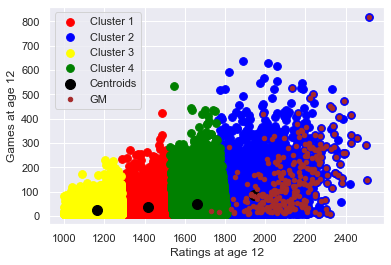

In [19]:
plt.scatter(df_cumulative_games_filtered.iloc[y_kmeans == 0, 0], df_cumulative_games_filtered.iloc[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(df_cumulative_games_filtered.iloc[y_kmeans == 1, 0], df_cumulative_games_filtered.iloc[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(df_cumulative_games_filtered.iloc[y_kmeans == 2, 0], df_cumulative_games_filtered.iloc[y_kmeans == 2, 1], s = 60, c = 'yellow', label = 'Cluster 3')
plt.scatter(df_cumulative_games_filtered.iloc[y_kmeans == 3, 0], df_cumulative_games_filtered.iloc[y_kmeans == 3, 1], s = 60, c = 'green', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter(df_cluster1.iloc[:,0], df_cluster1.iloc[:,1], s=20, c='brown', label='GM')
plt.xlabel('Ratings at age 12')
plt.ylabel('Games at age 12')
plt.legend()
plt.show()

In [20]:
dd=df_cumulative_games_filtered['y_means']=y_kmeans

In [21]:
df_cluster2=df_cluster1.join(df_cumulative_games_filtered['y_means'], how='left')
count1=df_cluster2['y_means'].value_counts()
count=df_cumulative_games_filtered['y_means'].value_counts()
print(count)
print(count1)

0    10043
3     8756
2     8392
1     4927
Name: y_means, dtype: int64
1    297
3      2
Name: y_means, dtype: int64


# Prediction

In [22]:
quartiles = df_cumulative_games_filtered['games_under_age_limit'].quantile([0.25,0.5,0.75,1]).values
print('Quartile for games played till age 12 - ' + str(quartiles))

lower_games_fide = []
lower_s_games_fide = []
medium_games_fide = []
higher_games_fide = []

for idx,row in df_cumulative_games_filtered.iterrows():
    if row['games_under_age_limit']<=quartiles[0]:
        lower_games_fide.append(idx[0])
    elif row['games_under_age_limit']<=quartiles[1]:
        lower_s_games_fide.append(idx[0])
    elif row['games_under_age_limit']<=quartiles[2]:
        medium_games_fide.append(idx[0])
    else:
        higher_games_fide.append(idx[0])

Quartile for games played till age 12 - [ 13.  24.  51. 819.]


(array([8.580e+02, 1.052e+03, 1.118e+03, 1.046e+03, 9.550e+02, 8.420e+02,
        7.060e+02, 5.970e+02, 4.760e+02, 3.940e+02, 3.410e+02, 2.230e+02,
        1.620e+02, 1.190e+02, 6.400e+01, 3.000e+01, 1.200e+01, 6.000e+00,
        0.000e+00, 1.000e+00]),
 array([1001. , 1091.5, 1182. , 1272.5, 1363. , 1453.5, 1544. , 1634.5,
        1725. , 1815.5, 1906. , 1996.5, 2087. , 2177.5, 2268. , 2358.5,
        2449. , 2539.5, 2630. , 2720.5, 2811. ]),
 <BarContainer object of 20 artists>)

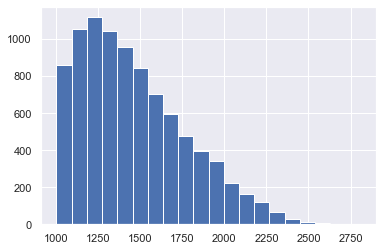

In [80]:
df_ratings.loc[lower_games_fide]['NOV-22'].mean()
plt.hist(df_ratings.loc[lower_games_fide]['NOV-22'], bins=20)

(array([310., 492., 665., 734., 703., 697., 637., 609., 520., 478., 424.,
        358., 258., 210., 147.,  94.,  56.,  50.,   9.,   9.]),
 array([1001. , 1083.8, 1166.6, 1249.4, 1332.2, 1415. , 1497.8, 1580.6,
        1663.4, 1746.2, 1829. , 1911.8, 1994.6, 2077.4, 2160.2, 2243. ,
        2325.8, 2408.6, 2491.4, 2574.2, 2657. ]),
 <BarContainer object of 20 artists>)

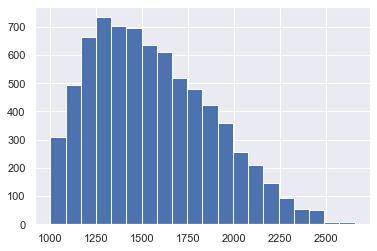

In [81]:
df_ratings.loc[lower_s_games_fide]['NOV-22'].mean()
plt.hist(df_ratings.loc[lower_s_games_fide]['NOV-22'], bins=20)

(array([184., 361., 461., 591., 658., 668., 674., 631., 608., 552., 491.,
        450., 404., 306., 227., 162., 118.,  57.,  30.,  12.]),
 array([1001.  , 1083.85, 1166.7 , 1249.55, 1332.4 , 1415.25, 1498.1 ,
        1580.95, 1663.8 , 1746.65, 1829.5 , 1912.35, 1995.2 , 2078.05,
        2160.9 , 2243.75, 2326.6 , 2409.45, 2492.3 , 2575.15, 2658.  ]),
 <BarContainer object of 20 artists>)

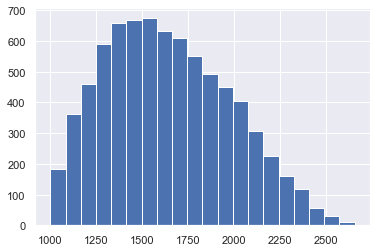

In [82]:
df_ratings.loc[medium_games_fide]['NOV-22'].mean()
plt.hist(df_ratings.loc[medium_games_fide]['NOV-22'], bins=20)

(array([ 56., 106., 236., 348., 481., 566., 619., 708., 666., 688., 689.,
        644., 595., 459., 431., 352., 198.,  95.,  57.,  17.]),
 array([1001. , 1090.2, 1179.4, 1268.6, 1357.8, 1447. , 1536.2, 1625.4,
        1714.6, 1803.8, 1893. , 1982.2, 2071.4, 2160.6, 2249.8, 2339. ,
        2428.2, 2517.4, 2606.6, 2695.8, 2785. ]),
 <BarContainer object of 20 artists>)

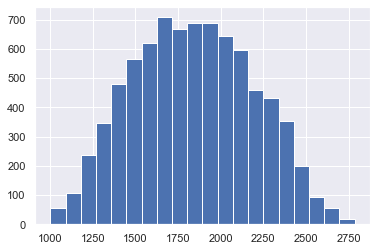

In [83]:
df_ratings.loc[higher_games_fide]['NOV-22'].mean()
plt.hist(df_ratings.loc[higher_games_fide]['NOV-22'], bins=20)

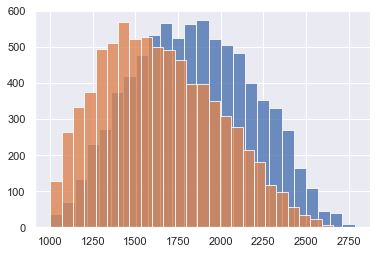

Ttest_indResult(statistic=-35.3295648107622, pvalue=1.9716633965035477e-263)

In [87]:
plt.hist(df_ratings.loc[higher_games_fide]['NOV-22'],bins=25, label='High', alpha=0.8)
plt.hist(df_ratings.loc[medium_games_fide]['NOV-22'],bins=25, label='Low', alpha=0.8)
plt.show()
stats.ttest_ind(df_ratings.loc[medium_games_fide]['NOV-22'], df_ratings.loc[higher_games_fide]['NOV-22'], alternative="less", equal_var=False)

# Inference 2

In [28]:
df_overall['mean']

fide_id
25121731     602.633167
35077023     602.633167
10207538            NaN
10680810    1279.448386
5716365             NaN
               ...     
21836060    8900.627083
34190632    6862.866706
24232602    6862.866706
1189980     8900.627083
21857814    8900.627083
Name: mean, Length: 392056, dtype: float64

In [29]:
gdp_mean = df_overall.dropna(subset=["mean"],axis=0)

In [30]:
count =gdp_mean.groupby('country').size()

In [31]:
print(len(gdp_mean))
gdp[['Country Code', 'mean']]
quartile=gdp['mean'].quantile([0.25,0.5,0.9,1]).values
quartile

292713


array([ 1057.84603987,  2984.81898184, 23212.60102596, 94695.5325901 ])

In [32]:
df_cumulative_games = df_num_games.cumsum(axis=1)
df_cumulative_games = df_cumulative_games.join(df_overall[['Dob','mean']], how="inner")
df_cumulative_games = df_cumulative_games.dropna(subset=["mean"],axis=0)
df_cumulative_games = df_cumulative_games.reset_index().set_index(["fide_id", "Dob"])

In [33]:
df_cumulative_games

,,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,MAR-22,APR-22,MAY-22,JUN-22,JUL-22,AUG-22,SEP-22,OCT-22,NOV-22,mean
fide_id,Dob,,,,,,,,,,,,,,,,,,,,,
25121731,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,602.633167
35077023,1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,602.633167
10680810,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1279.448386
5045886,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,165.0,165.0,165.0,165.0,165.0,165.0,174.0,174.0,182.0,602.633167
8605360,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2088.255792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836060,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,86.0,95.0,104.0,112.0,112.0,121.0,121.0,121.0,8900.627083
34190632,1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,6862.866706
24232602,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,6862.866706


In [34]:
df_cumulative_games['games_under_age_limit_17'] = pd.Series(dtype='float64')
df_cumulative_games['games_under_age_limit_19'] = pd.Series(dtype='float64')
df_cumulative_games['games_under_age_limit_12'] = pd.Series(dtype='float64')

In [35]:
age_limit = 12
age_limit1 = 17
age_limit2 = 19
cum_games_under_age = []

for idx,row in df_cumulative_games.iterrows():
    yob = idx[1]
    if (yob<1992 or yob>2002):
        continue
    else:
        month = "JUL"
        year = str(yob+age_limit+1)[-2:]
        if (int(year)>22):
            year="22"
        row['games_under_age_limit_12'] = (row[month+"-"+year])
        year = str(yob+age_limit1+1)[-2:]
        row['games_under_age_limit_17'] = (row[month+"-"+year])
        year = str(yob+age_limit2+1)[-2:]
        row['games_under_age_limit_19'] = (row[month+"-"+year])

In [36]:
df_cumulative_games = df_cumulative_games.dropna(subset=["games_under_age_limit_12"],axis=0)

In [37]:
df_cumulative_games=df_cumulative_games[df_cumulative_games['games_under_age_limit_12']>5]

In [38]:
quartile_12=df_cumulative_games['games_under_age_limit_12'].quantile([0.25,0.5,0.75,1]).values
quartile_12

array([ 14.,  26.,  53., 700.])

In [39]:
quartile_13=df_cumulative_games['games_under_age_limit_17'].quantile([0.25,0.5,0.75,1]).values
quartile_13

array([  36.,   96.,  225., 1360.])

In [40]:
#df_cumulative_games=df_cumulative_games[df_cumulative_games['games_under_age_limit_12']>26]
df_cumulative_games=df_cumulative_games[df_cumulative_games['games_under_age_limit_17']>96]

In [41]:
df_cumulative_games['Games_over_age_17']= df_cumulative_games['games_under_age_limit_19'].sub(df_cumulative_games['games_under_age_limit_17'])

In [42]:
df_cumulative_games=df_cumulative_games[df_cumulative_games['Games_over_age_17']<20]

In [43]:
df_high_gdp=df_cumulative_games[df_cumulative_games['mean']>=quartile[2]]
df_low_gdp=df_cumulative_games[df_cumulative_games['mean']<quartile[2]]
df_high_gdp_index = [tuple[0] for tuple in np.array(df_high_gdp.index)]
df_low_gdp_index = [tuple[0] for tuple in np.array(df_low_gdp.index)]

In [44]:
ratings_high_gdp=df_ratings.loc[df_high_gdp_index]['NOV-22']
ratings_low_gdp=df_ratings.loc[df_low_gdp_index]['NOV-22']

In [45]:
(ratings_high_gdp[ratings_high_gdp<2100])[ratings_high_gdp>1600].mean()

1867.9292929292928

In [46]:
(ratings_low_gdp[ratings_low_gdp<2100])[ratings_low_gdp>1600].mean()

1843.906522497384

# Classification

In [47]:
df_overall.Title_nov22.value_counts()

FM     8521
IM     3943
CM     2112
WFM    1832
GM     1779
WIM     838
WCM     796
WGM     322
SI      259
NI      244
FI      243
DI       74
FT       46
IO        6
Ng        1
Ram       1
WH        1
Name: Title_nov22, dtype: int64

In [48]:
df_overall.flag.value_counts(dropna=False)

i      204176
NaN    145693
wi      25791
w       16396
Name: flag, dtype: int64

In [49]:
male_prof_players = df_overall.loc[(df_overall['flag']!='i') & (df_overall['flag']!='w') & (df_overall['flag']!='wi') & ((df_overall['Title_nov22']=='GM') | (df_overall['Title_nov22']=='IM'))].index.values
print(len(male_prof_players))

male_non_prof_players = df_overall.loc[(df_overall['flag']!='i') & (df_overall['flag']!='w') & (df_overall['flag']!='wi') & (df_overall['Title_nov22']!='GM') & (df_overall['Title_nov22']!='IM')].index.values
print(len(male_non_prof_players))

3611
142082


In [50]:
df_ratings['rating_at_age_limit'] = pd.Series(dtype='float64')

In [51]:
data_dict = {}

for idx, row in df_ratings.loc[male_prof_players].iterrows():
    yob = idx[1]
    if (yob<1990 or yob>2005):
        continue
    else:
        month = "JAN"
        year = str(yob+age_limit+1)[-2:]
        if (int(year)>22):
            year="22"
        rating_from = month+"-"+str(yob)[-2:]
        if (datetime.strptime(rating_from, "%b-%y")<datetime.strptime("JAN-01", "%b-%y")):
            rating_from = "JAN-01"
        rating_till = month+"-"+year
        
        print(yob, rating_from, rating_till)
        data_dict[idx[0]] = row[rating_from:rating_till]
        
        

1993 JAN-01 JAN-06
1995 JAN-01 JAN-08
2002 JAN-02 JAN-15
2005 JAN-05 JAN-18
2002 JAN-02 JAN-15
2004 JAN-04 JAN-17
1992 JAN-01 JAN-05
1999 JAN-01 JAN-12
1991 JAN-01 JAN-04
1992 JAN-01 JAN-05
1992 JAN-01 JAN-05
1994 JAN-01 JAN-07
2000 JAN-01 JAN-13
1993 JAN-01 JAN-06
2001 JAN-01 JAN-14
2000 JAN-01 JAN-13
1991 JAN-01 JAN-04
1995 JAN-01 JAN-08
2004 JAN-04 JAN-17
2003 JAN-03 JAN-16
1999 JAN-01 JAN-12
1990 JAN-01 JAN-03
1990 JAN-01 JAN-03
2004 JAN-04 JAN-17
1999 JAN-01 JAN-12
1997 JAN-01 JAN-10
2002 JAN-02 JAN-15
2000 JAN-01 JAN-13
1997 JAN-01 JAN-10
2003 JAN-03 JAN-16
1998 JAN-01 JAN-11
1997 JAN-01 JAN-10
1993 JAN-01 JAN-06
1992 JAN-01 JAN-05
1992 JAN-01 JAN-05
1995 JAN-01 JAN-08
1993 JAN-01 JAN-06
2005 JAN-05 JAN-18
1993 JAN-01 JAN-06
1995 JAN-01 JAN-08
1990 JAN-01 JAN-03
1997 JAN-01 JAN-10
1995 JAN-01 JAN-08
1991 JAN-01 JAN-04
2004 JAN-04 JAN-17
1992 JAN-01 JAN-05
1997 JAN-01 JAN-10
1995 JAN-01 JAN-08
1996 JAN-01 JAN-09
2001 JAN-01 JAN-14
1999 JAN-01 JAN-12
1991 JAN-01 JAN-04
2002 JAN-02 

1996 JAN-01 JAN-09
2003 JAN-03 JAN-16
1994 JAN-01 JAN-07
2003 JAN-03 JAN-16
1991 JAN-01 JAN-04
1991 JAN-01 JAN-04
1991 JAN-01 JAN-04
1999 JAN-01 JAN-12
1991 JAN-01 JAN-04
1997 JAN-01 JAN-10
1996 JAN-01 JAN-09
1998 JAN-01 JAN-11
2001 JAN-01 JAN-14
2004 JAN-04 JAN-17
2000 JAN-01 JAN-13
1990 JAN-01 JAN-03
1991 JAN-01 JAN-04
2003 JAN-03 JAN-16
1993 JAN-01 JAN-06
2001 JAN-01 JAN-14
1990 JAN-01 JAN-03
2001 JAN-01 JAN-14
1991 JAN-01 JAN-04
2005 JAN-05 JAN-18
1998 JAN-01 JAN-11
1995 JAN-01 JAN-08
2002 JAN-02 JAN-15
2001 JAN-01 JAN-14
1991 JAN-01 JAN-04
1992 JAN-01 JAN-05
1991 JAN-01 JAN-04
1993 JAN-01 JAN-06
2001 JAN-01 JAN-14
1997 JAN-01 JAN-10
1999 JAN-01 JAN-12
1991 JAN-01 JAN-04
2000 JAN-01 JAN-13
1993 JAN-01 JAN-06
1993 JAN-01 JAN-06
1992 JAN-01 JAN-05
1997 JAN-01 JAN-10
1999 JAN-01 JAN-12
1993 JAN-01 JAN-06
1994 JAN-01 JAN-07
2005 JAN-05 JAN-18
2002 JAN-02 JAN-15
1992 JAN-01 JAN-05
1998 JAN-01 JAN-11
1994 JAN-01 JAN-07
2000 JAN-01 JAN-13
1996 JAN-01 JAN-09
1998 JAN-01 JAN-11
1999 JAN-01 

In [52]:
df_ratings_gm = pd.DataFrame.from_dict(data_dict, orient='index')
df_ratings_gm['label'] = 1
df_ratings_gm

,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,MAY-17,JUN-17,JUL-17,AUG-17,SEP-17,OCT-17,NOV-17,DEC-17,JAN-18,label
3409422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13402960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5019257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
727709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46617116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1917.0,1788.0,1788.0,1917.0,1959.0,1937.0,1914.0,1924.0,1888.0,1
34171980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1972.0,2070.0,2146.0,2146.0,2154.0,2215.0,2215.0,2233.0,2210.0,1
13413937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2356.0,2345.0,2345.0,2328.0,2351.0,2353.0,2353.0,2259.0,2259.0,1
958980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993.0,2013.0,1955.0,2020.0,2074.0,1999.0,1999.0,2149.0,2197.0,1


In [53]:
data_dict = {}
for idx, row in df_ratings.loc[male_non_prof_players].iterrows():
    yob = idx[1]
    if (yob<1990 or yob>2005):
        continue
    else:
        month = "JAN"
        year = str(yob+age_limit+1)[-2:]
        if (int(year)>22):
            year="22"
        rating_from = month+"-"+str(yob)[-2:]
        if (datetime.strptime(rating_from, "%b-%y")<datetime.strptime("JAN-01", "%b-%y")):
            rating_from = "JAN-01"
        rating_till = month+"-"+year
        print(rating_from, rating_till)
        data_dict[idx[0]] = row[rating_from:rating_till]

JAN-05 JAN-18
JAN-01 JAN-07
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-07
JAN-04 JAN-17
JAN-02 JAN-15
JAN-02 JAN-15
JAN-03 JAN-16
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-10
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-04
JAN-01 JAN-10
JAN-01 JAN-09
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-06
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-10
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-12
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-10
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-14
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-06
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-12
JAN-02 JAN-15
JAN-01 JAN-04
JAN-01 JAN-05
JAN-03

JAN-03 JAN-16
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-06
JAN-05 JAN-18
JAN-05 JAN-18
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-05
JAN-05 JAN-18
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-13
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-14
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-13
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-10
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-04
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-12
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-13
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-05
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-03
JAN-01

JAN-01 JAN-03
JAN-01 JAN-09
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-05
JAN-02 JAN-15
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-03
JAN-01 JAN-13
JAN-01 JAN-05
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-07
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-05
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-11
JAN-01 JAN-11
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-10
JAN-01 JAN-11
JAN-01 JAN-04
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-10
JAN-01 JAN-08
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-13
JAN-02 JAN-15
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-07
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-08
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01

JAN-01 JAN-07
JAN-01 JAN-08
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-09
JAN-05 JAN-18
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-07
JAN-01 JAN-05
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-06
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-03
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-09
JAN-01 JAN-09
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-04
JAN-04 JAN-17
JAN-05 JAN-18
JAN-02 JAN-15
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-09
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-04

JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-13
JAN-01 JAN-10
JAN-02 JAN-15
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-06
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-12
JAN-02 JAN-15
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-08
JAN-02 JAN-15
JAN-01 JAN-12
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-14
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-09
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-05
JAN-01 JAN-13
JAN-01 JAN-05
JAN-01 JAN-12
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-14
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-13
JAN-02 JAN-15
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-05
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01

JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-09
JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-04
JAN-02 JAN-15
JAN-01 JAN-12
JAN-02 JAN-15
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-04
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-10
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-04
JAN-05 JAN-18
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-08
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-06
JAN-01 JAN-03
JAN-01 JAN-13
JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01

JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-09
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-08
JAN-01 JAN-07
JAN-05 JAN-18
JAN-05 JAN-18
JAN-02 JAN-15
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-03
JAN-01 JAN-07
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-04
JAN-01 JAN-12
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-10
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01

JAN-02 JAN-15
JAN-01 JAN-14
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-14
JAN-01 JAN-13
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-06
JAN-01 JAN-12
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-07
JAN-03 JAN-16
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-04
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-04
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-14
JAN-05 JAN-18
JAN-05 JAN-18
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01

JAN-03 JAN-16
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-12
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-03
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-08
JAN-01 JAN-08
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-13
JAN-01 JAN-04
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-07
JAN-01 JAN-06
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-07
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-14
JAN-05 JAN-18
JAN-05 JAN-18
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-06
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-05
JAN-01 JAN-11
JAN-04

JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-08
JAN-02 JAN-15
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-03
JAN-01 JAN-13
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-05
JAN-01 JAN-07
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-07
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-06
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-10
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-06
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-04
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-14
JAN-03 JAN-16
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-06
JAN-01 JAN-13
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01

JAN-01 JAN-08
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-04
JAN-02 JAN-15
JAN-01 JAN-06
JAN-01 JAN-04
JAN-01 JAN-05
JAN-04 JAN-17
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-03
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-11
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-06
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-06
JAN-02 JAN-15
JAN-01 JAN-14
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-04
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01

JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-05
JAN-05 JAN-18
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-04
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-03
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-13
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-03
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-13
JAN-03 JAN-16
JAN-05 JAN-18
JAN-04 JAN-17
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-03
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01

JAN-01 JAN-07
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-08
JAN-01 JAN-14
JAN-01 JAN-13
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-08
JAN-03 JAN-16
JAN-03 JAN-16
JAN-05 JAN-18
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-12
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-05
JAN-01 JAN-10
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-09
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01

JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-09
JAN-05 JAN-18
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-05
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-11
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-06
JAN-01 JAN-03
JAN-03 JAN-16
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-04
JAN-01 JAN-12
JAN-02 JAN-15
JAN-05 JAN-18
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-03
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-04
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-08
JAN-01 JAN-11
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-08
JAN-05 JAN-18
JAN-05 JAN-18
JAN-05

JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01 JAN-04
JAN-01 JAN-05
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-08
JAN-01 JAN-13
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-03
JAN-01 JAN-06
JAN-01 JAN-03
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-14
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-04
JAN-02 JAN-15
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-09
JAN-02 JAN-15
JAN-01 JAN-06
JAN-01 JAN-12
JAN-01 JAN-12
JAN-01 JAN-09
JAN-01 JAN-13
JAN-03 JAN-16
JAN-01 JAN-07
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-07
JAN-01 JAN-04
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-13
JAN-03 JAN-16
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01

JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-08
JAN-01 JAN-14
JAN-01 JAN-03
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-08
JAN-01 JAN-06
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-10
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-05
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-06
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-08
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-07
JAN-01 JAN-06
JAN-01 JAN-09
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-11
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-11
JAN-02 JAN-15
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-14
JAN-03

JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-14
JAN-02 JAN-15
JAN-05 JAN-18
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-12
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-06
JAN-01 JAN-05
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-14
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-10
JAN-05 JAN-18
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-14
JAN-03 JAN-16
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-12
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-13
JAN-03 JAN-16
JAN-01 JAN-06
JAN-04 JAN-17
JAN-05

JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-12
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-04
JAN-01 JAN-08
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-12
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-07
JAN-01 JAN-13
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-06
JAN-01 JAN-08
JAN-01 JAN-05
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-06
JAN-01 JAN-13
JAN-01 JAN-03
JAN-04 JAN-17
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-11
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-10
JAN-02 JAN-15
JAN-01 JAN-05
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-03
JAN-05 JAN-18
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-05
JAN-01 JAN-07
JAN-05

JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-13
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-03
JAN-01 JAN-06
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-12
JAN-01 JAN-08
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-14
JAN-01 JAN-03
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-04
JAN-01 JAN-06
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-09
JAN-02 JAN-15
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-12
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-09
JAN-01 JAN-03
JAN-01 JAN-13
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-12
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-03
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-05
JAN-01 JAN-11
JAN-01

JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-04
JAN-01 JAN-11
JAN-01 JAN-12
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-05
JAN-05 JAN-18
JAN-04 JAN-17
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-14
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-04
JAN-04 JAN-17
JAN-04 JAN-17
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-14
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-10
JAN-01 JAN-05
JAN-01 JAN-04
JAN-01 JAN-11
JAN-01 JAN-04
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-10
JAN-04 JAN-17
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-06
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-04
JAN-01 JAN-13
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-04
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-08
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-06
JAN-04 JAN-17
JAN-01

JAN-01 JAN-04
JAN-01 JAN-14
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-08
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-12
JAN-01 JAN-05
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-13
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-13
JAN-02 JAN-15
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-05
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-13
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-03
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-13
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-11
JAN-01 JAN-05
JAN-03 JAN-16
JAN-01 JAN-09
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-08
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-12
JAN-04 JAN-17
JAN-01

JAN-01 JAN-08
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-08
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-09
JAN-05 JAN-18
JAN-04 JAN-17
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-12
JAN-01 JAN-04
JAN-01 JAN-07
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-08
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-06
JAN-01 JAN-03
JAN-01 JAN-06
JAN-01 JAN-13
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-14
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-10
JAN-02 JAN-15
JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-08
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-14
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-10
JAN-04 JAN-17
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-10
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-06
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01

JAN-05 JAN-18
JAN-04 JAN-17
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-04
JAN-02 JAN-15
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-13
JAN-02 JAN-15
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-05
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-12
JAN-01 JAN-05
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-08
JAN-03 JAN-16
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-09
JAN-02 JAN-15
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-12
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-03
JAN-02

JAN-01 JAN-06
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-10
JAN-04 JAN-17
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-10
JAN-02 JAN-15
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-13
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-08
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-12
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-12
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-11
JAN-01 JAN-13
JAN-02

JAN-01 JAN-10
JAN-01 JAN-14
JAN-04 JAN-17
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-12
JAN-01 JAN-08
JAN-02 JAN-15
JAN-01 JAN-07
JAN-01 JAN-06
JAN-01 JAN-06
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-11
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-04
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-05
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-03
JAN-01 JAN-06
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-12
JAN-01 JAN-08
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-09
JAN-01 JAN-05
JAN-01 JAN-04
JAN-01

JAN-01 JAN-13
JAN-04 JAN-17
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-04
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-14
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-03
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-04
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-04
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-08
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-12
JAN-01 JAN-08
JAN-01

JAN-05 JAN-18
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-06
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-12
JAN-01 JAN-09
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-08
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-03
JAN-01 JAN-05
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-08
JAN-01 JAN-04
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-05
JAN-01 JAN-14
JAN-01 JAN-14
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-03
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-11
JAN-02 JAN-15
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-12
JAN-01 JAN-07
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-09
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-09
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-14
JAN-04

JAN-01 JAN-04
JAN-01 JAN-06
JAN-03 JAN-16
JAN-03 JAN-16
JAN-05 JAN-18
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-11
JAN-04 JAN-17
JAN-04 JAN-17
JAN-03 JAN-16
JAN-05 JAN-18
JAN-04 JAN-17
JAN-05 JAN-18
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-04
JAN-01 JAN-05
JAN-03 JAN-16
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-07
JAN-01 JAN-12
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-08
JAN-01 JAN-08
JAN-01 JAN-03
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-08
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-12
JAN-01 JAN-06
JAN-01 JAN-08
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-03
JAN-01 JAN-13
JAN-01 JAN-03
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-05
JAN-01 JAN-07
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-11
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-09
JAN-03

JAN-01 JAN-04
JAN-01 JAN-05
JAN-04 JAN-17
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-13
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-13
JAN-04 JAN-17
JAN-05 JAN-18
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-09
JAN-01 JAN-09
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-10
JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-06
JAN-05 JAN-18
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-12
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-05
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-08
JAN-01 JAN-08
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-07
JAN-01 JAN-11
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-14
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-09
JAN-01

JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-09
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-13
JAN-01 JAN-08
JAN-02 JAN-15
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-05
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-09
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-10
JAN-01 JAN-03
JAN-04 JAN-17
JAN-01 JAN-05
JAN-03 JAN-16
JAN-01 JAN-07
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-10
JAN-04 JAN-17
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-04
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-06
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-06
JAN-05 JAN-18
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-07
JAN-03 JAN-16
JAN-05

JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-09
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-09
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-07
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-09
JAN-02 JAN-15
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-13
JAN-02 JAN-15
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01

JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-05
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-06
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-03
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-08
JAN-01 JAN-10
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-10
JAN-01 JAN-14
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-14
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-05
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-13
JAN-03 JAN-16
JAN-05 JAN-18
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-14
JAN-01 JAN-05
JAN-01 JAN-05
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-11
JAN-01 JAN-13
JAN-04 JAN-17
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-13
JAN-01 JAN-10
JAN-03 JAN-16
JAN-02 JAN-15
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-10
JAN-02 JAN-15
JAN-01

JAN-01 JAN-04
JAN-01 JAN-04
JAN-04 JAN-17
JAN-01 JAN-14
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-06
JAN-01 JAN-08
JAN-01 JAN-04
JAN-02 JAN-15
JAN-01 JAN-04
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-04
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-13
JAN-01 JAN-07
JAN-01 JAN-07
JAN-01 JAN-04
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-11
JAN-01 JAN-10
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-12
JAN-01 JAN-10
JAN-01 JAN-07
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-08
JAN-01 JAN-07
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-12
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-06
JAN-01 JAN-05
JAN-01 JAN-14
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-13
JAN-04

JAN-01 JAN-11
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-05
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-12
JAN-01 JAN-08
JAN-03 JAN-16
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-06
JAN-03 JAN-16
JAN-01 JAN-09
JAN-03 JAN-16
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-11
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-10
JAN-02 JAN-15
JAN-01 JAN-10
JAN-01 JAN-09
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-11
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-03
JAN-01 JAN-14
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-07
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-09
JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-06
JAN-04 JAN-17
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-03
JAN-04 JAN-17
JAN-04

JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-03
JAN-01 JAN-05
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-09
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-11
JAN-03 JAN-16
JAN-01 JAN-14
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-09
JAN-01 JAN-08
JAN-05 JAN-18
JAN-01 JAN-10
JAN-05 JAN-18
JAN-01 JAN-13
JAN-01 JAN-13
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-10
JAN-03 JAN-16
JAN-05 JAN-18
JAN-01 JAN-11
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-14
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-12
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-06
JAN-01 JAN-07
JAN-01 JAN-14
JAN-01 JAN-08
JAN-04 JAN-17
JAN-01 JAN-03
JAN-01 JAN-04
JAN-03 JAN-16
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-05
JAN-01 JAN-09
JAN-01 JAN-14
JAN-04 JAN-17
JAN-01 JAN-13
JAN-01 JAN-05
JAN-01 JAN-14
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-08
JAN-01 JAN-09
JAN-01 JAN-12
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-04
JAN-01 JAN-13
JAN-01 JAN-12
JAN-03 JAN-16
JAN-04

JAN-01 JAN-09
JAN-01 JAN-07
JAN-02 JAN-15
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-03
JAN-03 JAN-16
JAN-02 JAN-15
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-09
JAN-01 JAN-04
JAN-01 JAN-12
JAN-01 JAN-11
JAN-05 JAN-18
JAN-02 JAN-15
JAN-04 JAN-17
JAN-05 JAN-18
JAN-01 JAN-12
JAN-01 JAN-14
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-14
JAN-01 JAN-05
JAN-05 JAN-18
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-04
JAN-05 JAN-18
JAN-01 JAN-14
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-13
JAN-05 JAN-18
JAN-04 JAN-17
JAN-05 JAN-18
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-05
JAN-01 JAN-13
JAN-01 JAN-12
JAN-03 JAN-16
JAN-03 JAN-16
JAN-05 JAN-18
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-05
JAN-03 JAN-16
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-10
JAN-05 JAN-18
JAN-04 JAN-17
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-04
JAN-01 JAN-12
JAN-03 JAN-16
JAN-04

JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-10
JAN-04 JAN-17
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-03
JAN-04 JAN-17
JAN-03 JAN-16
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-05
JAN-02 JAN-15
JAN-01 JAN-11
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-08
JAN-04 JAN-17
JAN-02 JAN-15
JAN-01 JAN-12
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-09
JAN-04 JAN-17
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-03
JAN-01 JAN-11
JAN-01 JAN-09
JAN-05 JAN-18
JAN-02 JAN-15
JAN-01 JAN-03
JAN-01 JAN-04
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-03
JAN-01 JAN-08
JAN-02 JAN-15
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-05
JAN-01 JAN-08
JAN-01 JAN-09
JAN-01 JAN-10
JAN-05 JAN-18
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-09
JAN-01 JAN-05
JAN-01 JAN-05
JAN-01 JAN-10
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-05
JAN-01 JAN-10
JAN-03 JAN-16
JAN-01 JAN-11
JAN-01 JAN-08
JAN-01 JAN-04
JAN-04 JAN-17
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-10
JAN-01 JAN-10
JAN-05

JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-09
JAN-01 JAN-12
JAN-01 JAN-07
JAN-01 JAN-14
JAN-03 JAN-16
JAN-01 JAN-06
JAN-01 JAN-09
JAN-01 JAN-09
JAN-01 JAN-14
JAN-03 JAN-16
JAN-04 JAN-17
JAN-05 JAN-18
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-10
JAN-01 JAN-13
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-13
JAN-02 JAN-15
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-12
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-07
JAN-02 JAN-15
JAN-01 JAN-13
JAN-01 JAN-06
JAN-01 JAN-13
JAN-01 JAN-04
JAN-01 JAN-14
JAN-01 JAN-12
JAN-01 JAN-05
JAN-03 JAN-16
JAN-04 JAN-17
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-13
JAN-01 JAN-13
JAN-05 JAN-18
JAN-01 JAN-12
JAN-03 JAN-16
JAN-01 JAN-10
JAN-01 JAN-03
JAN-01 JAN-13
JAN-04 JAN-17
JAN-02 JAN-15
JAN-05 JAN-18
JAN-03 JAN-16
JAN-04 JAN-17
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01 JAN-05
JAN-05 JAN-18
JAN-01 JAN-12
JAN-05 JAN-18
JAN-01 JAN-04
JAN-01 JAN-06
JAN-01 JAN-11
JAN-01 JAN-11
JAN-01 JAN-05
JAN-01 JAN-06
JAN-01 JAN-06
JAN-01 JAN-08
JAN-01 JAN-10
JAN-01

JAN-01 JAN-03
JAN-01 JAN-13
JAN-04 JAN-17
JAN-03 JAN-16
JAN-04 JAN-17
JAN-02 JAN-15
JAN-05 JAN-18
JAN-01 JAN-14
JAN-01 JAN-03
JAN-01 JAN-06
JAN-01 JAN-04
JAN-01 JAN-11
JAN-01 JAN-11
JAN-03 JAN-16
JAN-05 JAN-18
JAN-04 JAN-17
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-07
JAN-01 JAN-03
JAN-01 JAN-10
JAN-01 JAN-03
JAN-05 JAN-18
JAN-01 JAN-08
JAN-01 JAN-09
JAN-04 JAN-17
JAN-02 JAN-15
JAN-03 JAN-16
JAN-05 JAN-18
JAN-03 JAN-16
JAN-03 JAN-16
JAN-01 JAN-04
JAN-01 JAN-06
JAN-01 JAN-10
JAN-01 JAN-04
JAN-01 JAN-09
JAN-05 JAN-18
JAN-01 JAN-06
JAN-01 JAN-14
JAN-02 JAN-15
JAN-01 JAN-12
JAN-01 JAN-03
JAN-01 JAN-03
JAN-01 JAN-14
JAN-01 JAN-11
JAN-05 JAN-18
JAN-01 JAN-07
JAN-01 JAN-08
JAN-01 JAN-11
JAN-04 JAN-17
JAN-01 JAN-05
JAN-01 JAN-13
JAN-03 JAN-16
JAN-01 JAN-14
JAN-01 JAN-13
JAN-01 JAN-11
JAN-01 JAN-03
JAN-02 JAN-15
JAN-01 JAN-14
JAN-02 JAN-15
JAN-03 JAN-16
JAN-01 JAN-09
JAN-01 JAN-11
JAN-01 JAN-03
JAN-01 JAN-11
JAN-05 JAN-18
JAN-04 JAN-17
JAN-01 JAN-12
JAN-01 JAN-06
JAN-05 JAN-18
JAN-05

In [54]:
df_ratings_nongm = pd.DataFrame.from_dict(data_dict, orient='index')
timesorted_columns = sorted(list(df_ratings_nongm.columns.values), key= lambda x: datetime.strptime(x, "%b-%y"))
df_ratings_nongm = df_ratings_nongm[timesorted_columns]
df_ratings_nongm['label'] = 0
df_ratings_gm.shape

(1099, 120)

In [88]:
df_cumulative_games = df_num_games.cumsum(axis=1)
df_cumulative_games = df_cumulative_games.join(df_overall[['Dob','mean']], how="inner")
df_cumulative_games = df_cumulative_games.dropna(subset=["mean"],axis=0)
df_cumulative_games = df_cumulative_games.reset_index().set_index(["fide_id", "Dob"])

In [89]:
df_cumulative_games

,,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,MAR-22,APR-22,MAY-22,JUN-22,JUL-22,AUG-22,SEP-22,OCT-22,NOV-22,mean
fide_id,Dob,,,,,,,,,,,,,,,,,,,,,
25121731,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,602.633167
35077023,1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,602.633167
10680810,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1279.448386
5045886,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,165.0,165.0,165.0,165.0,165.0,165.0,174.0,174.0,182.0,602.633167
8605360,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2088.255792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836060,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,86.0,95.0,104.0,112.0,112.0,121.0,121.0,121.0,8900.627083
34190632,1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,6862.866706
24232602,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,6862.866706


In [90]:
df_cumulative_games['games_under_age_limit'] = pd.Series(dtype='float64')
age_limit = 12
cum_games_under_age = []

for idx,row in df_cumulative_games.iterrows():
    yob = idx[1]
    if (yob<1992 or yob>2002):
        continue
    else:
        month = "JUL"
        year = str(yob+age_limit+1)[-2:]
        if (int(year)>22):
            year="22"
        row['games_under_age_limit'] = (row[month+"-"+year])

In [91]:
df_cumulative_games=df_cumulative_games.reset_index()
df_cumulative_games=df_cumulative_games.set_index('fide_id')
df_cumulative_games

,Dob,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,...,APR-22,MAY-22,JUN-22,JUL-22,AUG-22,SEP-22,OCT-22,NOV-22,mean,games_under_age_limit
fide_id,,,,,,,,,,,,,,,,,,,,,
25121731,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,602.633167,NaN
35077023,1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,602.633167,NaN
10680810,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1279.448386,0.0
5045886,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,165.0,165.0,165.0,165.0,165.0,174.0,174.0,182.0,602.633167,NaN
8605360,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2088.255792,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836060,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,95.0,104.0,112.0,112.0,121.0,121.0,121.0,8900.627083,NaN
34190632,1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,6862.866706,NaN
24232602,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,6862.866706,0.0


In [92]:
df_ratings_nongm = df_ratings_nongm.sample(frac=0.2, replace=False, random_state=42)

In [93]:
df_ratings_combined = pd.concat([df_ratings_gm, df_ratings_nongm], axis=0)
df_ratings_combined.shape

(2607, 120)

In [94]:
df_ratings_combined = df_ratings_combined.dropna(axis=0, how='any', thresh=2)
df_ratings_combined= df_ratings_combined.join(df_cumulative_games['games_under_age_limit'], how='left')
df_ratings_combined

,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,JUN-17,JUL-17,AUG-17,SEP-17,OCT-17,NOV-17,DEC-17,JAN-18,label,games_under_age_limit
13402960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,184.0
5019257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.0
124311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.0
727709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5018471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45022259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5035023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15.0
3309339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1194380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,229.0


In [95]:
y = df_ratings_combined['label']
df_ratings_combined = df_ratings_combined.drop(['label'], axis=1)
df_ratings_combined = df_ratings_combined.join(df_overall['country'], how="inner")
df_ratings_combined = df_ratings_combined.join(df_overall['mean'], how="inner")
df_ratings_combined['mean'].fillna(value=df_ratings_combined['mean'].mean(), inplace=True)
df_ratings_combined = pd.get_dummies(df_ratings_combined)

In [96]:

df_ratings_combined

,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,country_TKM,country_TPE,country_TTO,country_TUR,country_UAE,country_UKR,country_USA,country_UZB,country_VEN,country_VIE
13402960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5019257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
124311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
727709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5018471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45022259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5035023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3309339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1194380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ratings_combined, y, test_size=0.1, random_state=42)

from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X_train, y_train)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.94      0.93      0.93        84

    accuracy                           0.90       115
   macro avg       0.88      0.88      0.88       115
weighted avg       0.91      0.90      0.90       115



C:\Users\chitv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


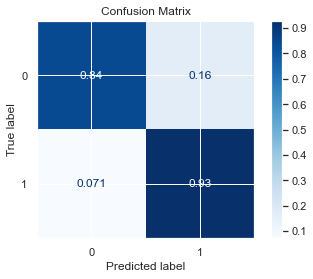

In [102]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion Matrix')
plt.show()

# Prediction

In [66]:
df_ratings_combined = pd.concat([df_ratings_gm, df_ratings_nongm], axis=0)

In [67]:
df_ratings_combined = df_ratings_combined.dropna(axis=0, how='any', thresh=2)
df_ratings_combined= df_ratings_combined.join(df_cumulative_games['games_under_age_limit'], how='left')
df_ratings_combined = df_ratings_combined.join(df_overall['country'], how="inner")
df_ratings_combined = df_ratings_combined.join(df_overall['mean'], how="inner")
df_ratings_combined['mean'].fillna(value=df_ratings_combined['mean'].mean(), inplace=True)
df_ratings_combined = pd.get_dummies(df_ratings_combined)
df_ratings_combined

,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,country_TUN,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_UZB,country_VEN,country_VIE,country_WLS
13402960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5019257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
124311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
727709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5018471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26024578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
24526223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2297914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
32028261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y = df_overall.loc[df_ratings_combined.loc[df_ratings_combined.label==1].index]['Ratings_nov22'].values
df_ratings_combined = df_ratings_combined.loc[df_ratings_combined.label==1]
df_ratings_combined = df_ratings_combined.drop("label", axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_ratings_combined, y, test_size=0.1, random_state=42)

In [70]:
from sklearn.ensemble import HistGradientBoostingRegressor

clf = HistGradientBoostingRegressor().fit(X_train, y_train)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred, squared=False))

111.59873970331458


In [73]:
np.linspace(1, len(y_test),len(y_test))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82.])

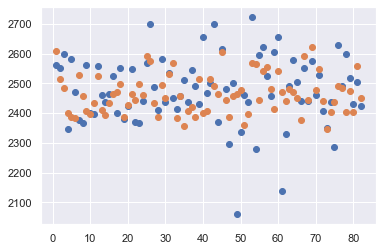

In [74]:
plt.scatter(np.linspace(1, len(y_test),len(y_test)) , y_test)
plt.scatter(np.linspace(1, len(y_test),len(y_test)), y_pred)

In [75]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mean_absolute_percentage_error(y_test, y_pred)

0.03320301221008236

In [76]:
X_test

,JAN-01,APR-01,JUL-01,OCT-01,JAN-02,APR-02,JUL-02,OCT-02,JAN-03,APR-03,...,country_TUN,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_UZB,country_VEN,country_VIE,country_WLS
751499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4169530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
24604747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
15000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1319620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14113147,NaN,NaN,NaN,NaN,NaN,NaN,2100.0,2151.0,2160.0,NaN,...,0,0,0,1,0,0,0,0,0,0
13308327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1127993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0,...,0,0,0,0,0,0,0,0,0,0
13303635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
